In [92]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import eleanor
import lightkurve as lk
from matplotlib import rcParams; rcParams["figure.dpi"] = 150

star = eleanor.Source(tic=91961, sector='recent')
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=False, do_pca=True, regressors='corner')
plt.figure(figsize=(15, 5))
q = data.quality == 0

No eleanor postcard has been made for your target (yet). Using TessCut instead.


<Figure size 2250x750 with 0 Axes>

In [93]:
lk = data.to_lightkurve().normalize()
period = np.linspace(1, 10, 10000)
bls = lk.to_periodogram(method='bls', period=period, frequency_factor=500)

period = bls.period_at_max_power.value * 2
t0 = bls.transit_time_at_max_power.value
duration = bls.duration_at_max_power

period, t0, duration

(5.283528352835283, 2334.4799011186674, <Quantity 0.05 d>)

<AxesSubplot: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

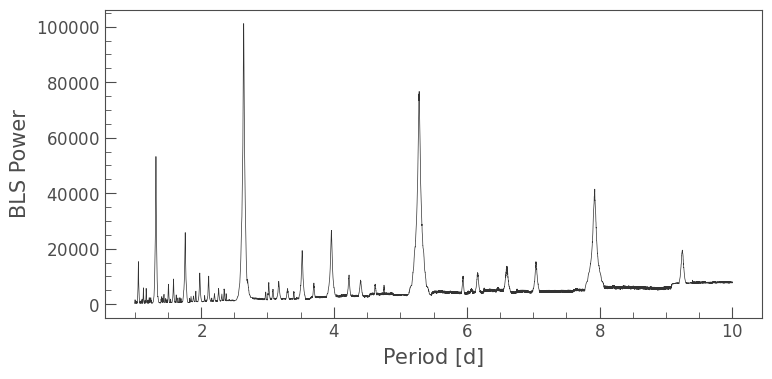

In [94]:
bls.plot()

In [95]:
from transitleastsquares import transitleastsquares
model = transitleastsquares(lk.time.value, lk.flux.value)
results = model.power(oversampling_factor=5, duration_grid_step=1.02, period_min=2.0, period_max=10.0)

Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 167 durations
Searching 3642 data points, 1723 periods from 2.001 to 9.993 days
Using all 8 CPU threads


100%|██████████| 1723/1723 periods | 00:29<00:00


Searching for best T0 for period 2.64177 days


(0.0, 9.993194200568658)

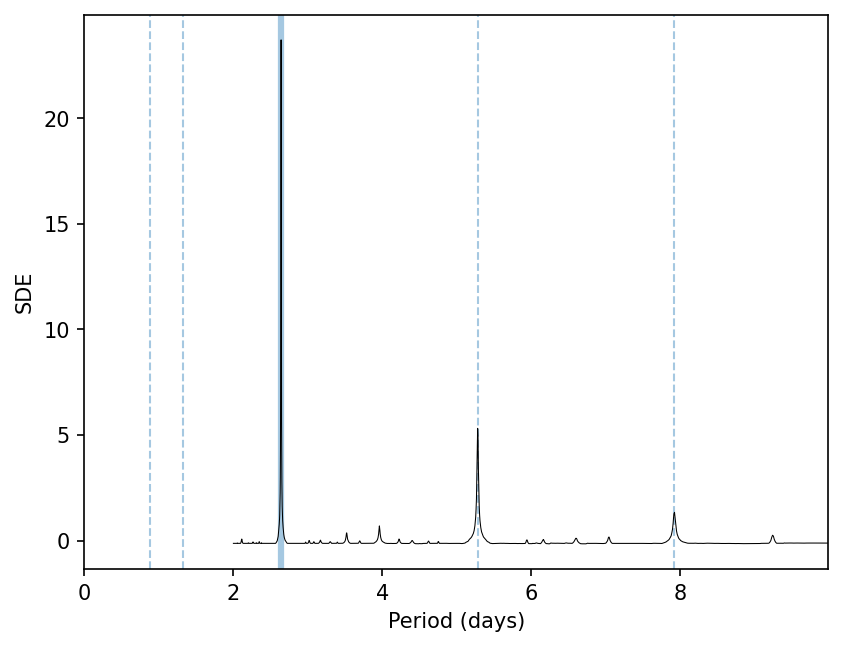

In [96]:
plt.figure()
ax = plt.gca()
ax.axvline(results.period, alpha=0.4, lw=3)
plt.xlim(np.min(results.periods), np.max(results.periods))
for n in range(2, 4):
    ax.axvline(n * results.period, alpha=0.4, lw=1, linestyle='dashed')
    ax.axvline(results.period / n, alpha=0.4, lw=1, linestyle='dashed')
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results.periods, results.power, color='black', lw=0.5)
plt.xlim(0, max(results.periods))

(0.4, 0.6)

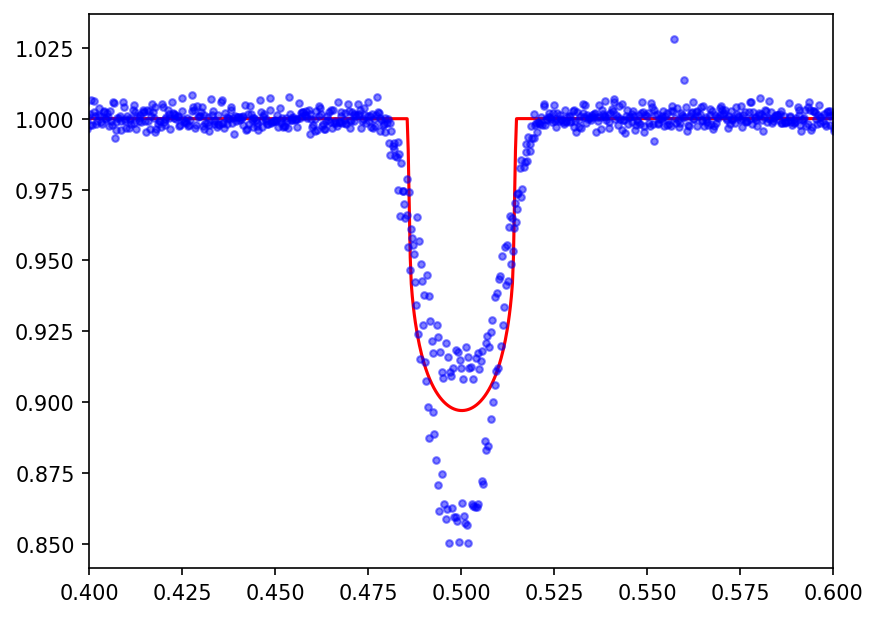

In [97]:
plt.figure()
plt.plot(
    results.model_folded_phase,
    results.model_folded_model,
    color='red'
)
plt.scatter(
    results.folded_phase,
    results.folded_y,
    color='blue',
    s=10,
    alpha=0.5,
    zorder=2
)
plt.xlim(0.4, 0.6)

<AxesSubplot: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

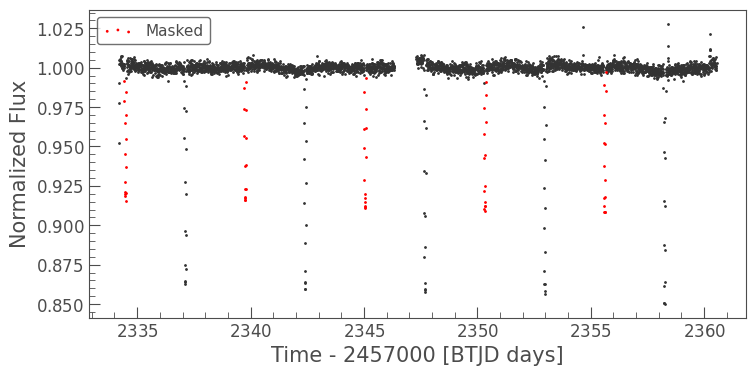

In [98]:
mask = bls.get_transit_mask(period=period, transit_time=t0, duration=duration*2)
masked_lk = lk[~mask]
ax = masked_lk.scatter()
lk[mask].scatter(ax=ax, c='r', label='Masked')

Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 167 durations
Searching 3571 data points, 1723 periods from 2.001 to 9.993 days
Using all 8 CPU threads


100%|██████████| 1723/1723 periods | 00:32<00:00


Searching for best T0 for period 2.64177 days


C:\Coding\Python Projects\light curve testing\venv\lib\site-packages\transitleastsquares\main.py:411: UserWarning: 5 of 10 transits without data. The true period may be twice the given period.
  warnings.warn(text)


(0.4, 0.6)

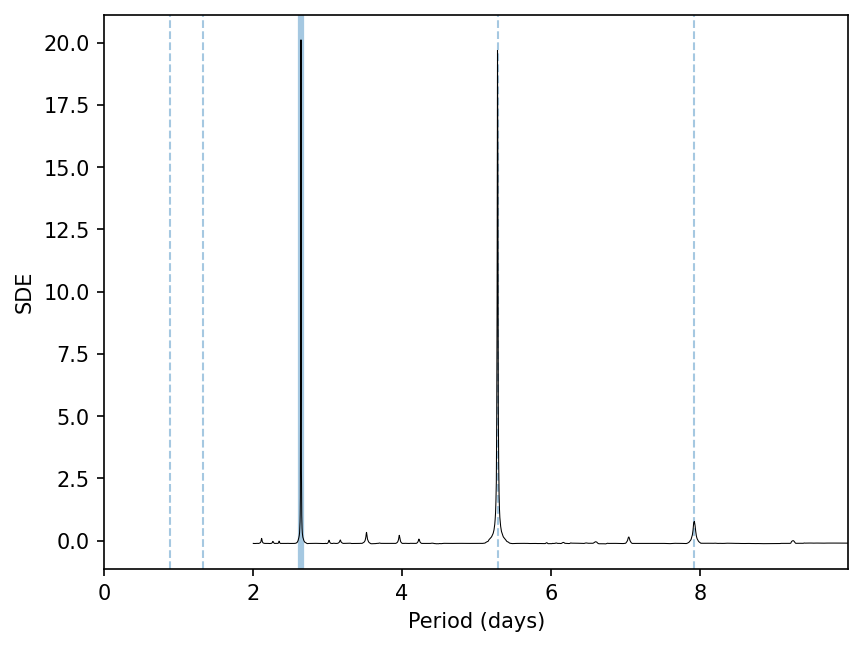

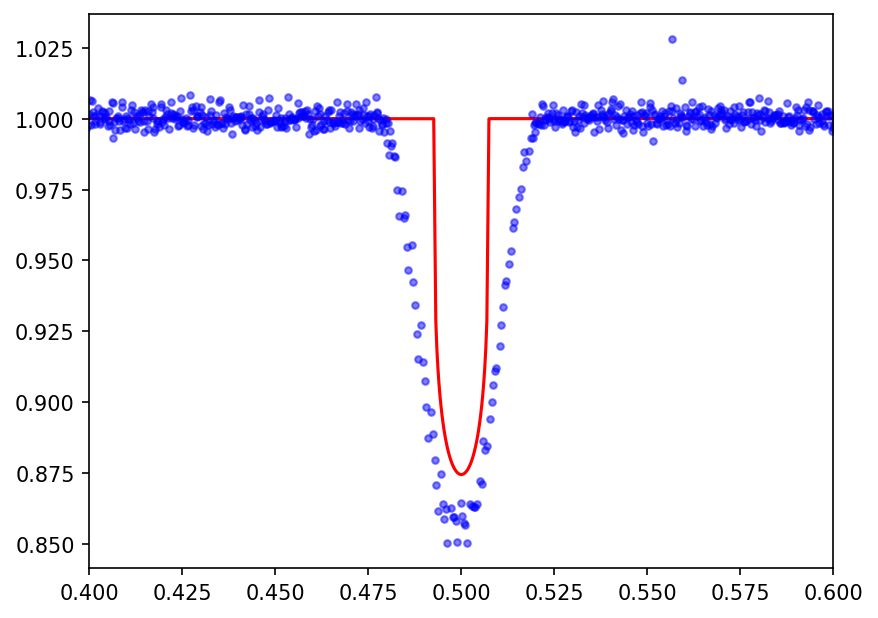

In [99]:
masked_model = transitleastsquares(masked_lk.time.value, masked_lk.flux.value)
results = masked_model.power(oversampling_factor=5, duration_grid_step=1.02, period_min=2.0, period_max=10.0)

plt.figure()
ax = plt.gca()
ax.axvline(results.period, alpha=0.4, lw=3)
plt.xlim(np.min(results.periods), np.max(results.periods))
for n in range(2, 4):
    ax.axvline(n * results.period, alpha=0.4, lw=1, linestyle='dashed')
    ax.axvline(results.period / n, alpha=0.4, lw=1, linestyle='dashed')
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results.periods, results.power, color='black', lw=0.5)
plt.xlim(0, max(results.periods))

plt.figure()
plt.plot(
    results.model_folded_phase,
    results.model_folded_model,
    color='red'
)
plt.scatter(
    results.folded_phase,
    results.folded_y,
    color='blue',
    s=10,
    alpha=0.5,
    zorder=2
)
plt.xlim(0.4, 0.6)